In [18]:
import os
import numpy as np
import pandas as pd
import uproot as ur

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

In [19]:
obs_features = ["obs_energy_weight", "obs_R_L", "obs_jet_pt"]
gen_features = ["gen_energy_weight", "gen_R_L", "gen_jet_pt"]

labels = ["energy weight", "$R_L$", "jet $p_T$"]

dummyval = [-9999 for i in range(3)]

pt_lo = [0.2, 0.3, 0.5, 1, 2]
pt_hi = [0.3, 0.5, 1, 2, 5]

In [20]:
natural_file = ur.open("./output_mc/AnalysisResults.root")

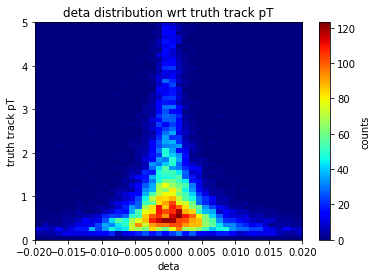

In [21]:
hist = natural_file["h2d_matched_part_deta_pt"]
counts = hist.values()
x_edges = hist.axis("x").edges()
counts = hist.values()
y_edges = hist.axis("y").edges()

plt.figure()
plt.imshow(counts.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], aspect='auto', cmap='jet')
plt.xlabel("deta")
plt.ylabel("truth track pT")
plt.xlim(-0.02, 0.02)
plt.ylim(0, 5)
plt.title("deta distribution wrt truth track pT")
plt.colorbar(label="counts")
plt.show()

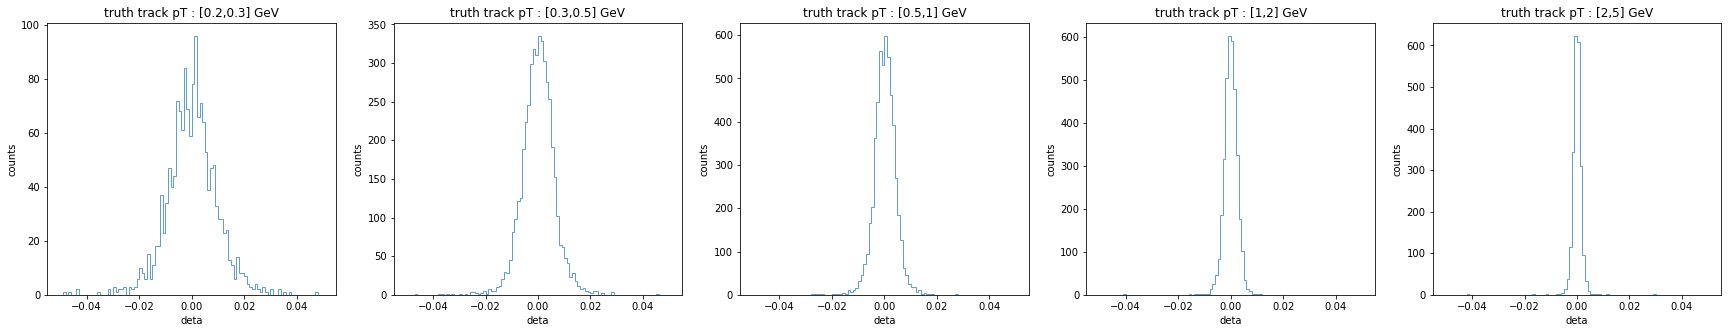

In [22]:
fig, axs = plt.subplots(1, len(pt_lo), figsize=(6*len(pt_lo), 5))

for i in range(len(pt_lo)):
    ax = axs[i]
    y_mask = (pt_lo[i] <= y_edges) & (y_edges <= pt_hi[i])
    y_counts = counts[:, y_mask[:len(y_mask)-1]].sum(axis=1)
    ax.hist(x_edges[:-1], x_edges, weights=y_counts, histtype="step", alpha=0.7)
    ax.set_xlabel("deta")
    ax.set_ylabel("counts")
    ax.set_title("truth track pT : ["+str(pt_lo[i])+","+str(pt_hi[i])+"] GeV")

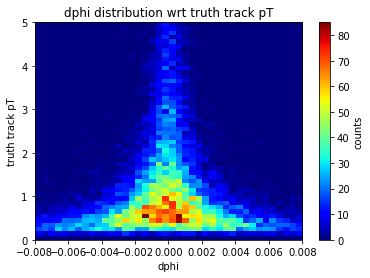

In [23]:
hist = natural_file["h2d_matched_part_dphi_pt"]
counts = hist.values()
x_edges = hist.axis("x").edges()
counts = hist.values()
y_edges = hist.axis("y").edges()

plt.figure()
plt.imshow(counts.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], aspect='auto', cmap='jet')
plt.xlabel("dphi")
plt.ylabel("truth track pT")
plt.xlim(-0.008, 0.008)
plt.ylim(0, 5)
plt.title("dphi distribution wrt truth track pT")
plt.colorbar(label="counts")
plt.show()

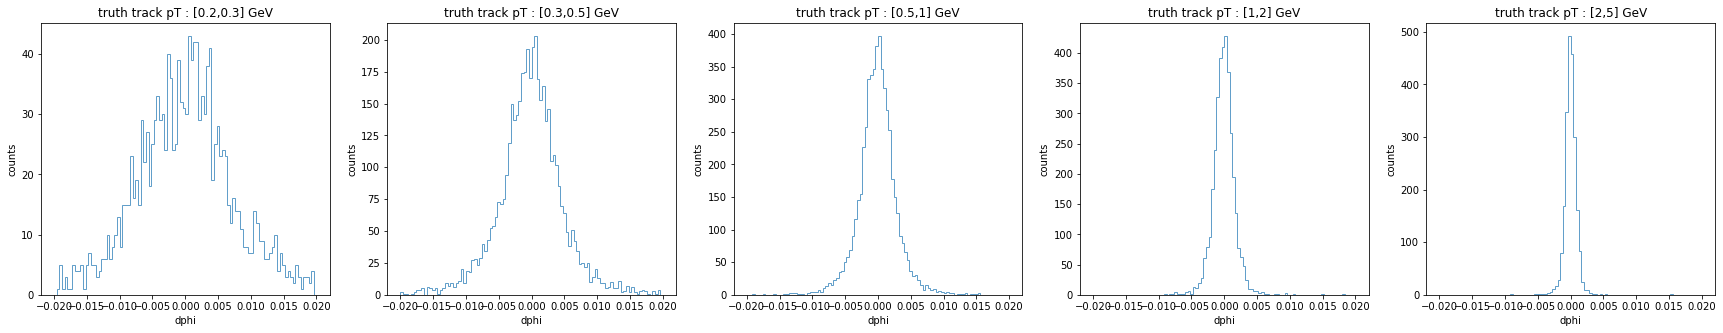

In [24]:
fig, axs = plt.subplots(1, len(pt_lo), figsize=(6*len(pt_lo), 5))

for i in range(len(pt_lo)):
    ax = axs[i]
    y_mask = (pt_lo[i] <= y_edges) & (y_edges <= pt_hi[i])
    y_counts = counts[:, y_mask[:len(y_mask)-1]].sum(axis=1)
    ax.hist(x_edges[:-1], x_edges, weights=y_counts, histtype="step", alpha=0.7)
    ax.set_xlabel("dphi")
    ax.set_ylabel("counts")
    ax.set_title("truth track pT : ["+str(pt_lo[i])+","+str(pt_hi[i])+"] GeV")

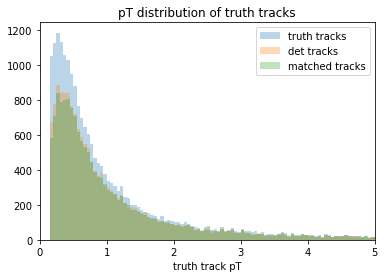

number truth parts = 20873.0
number det   parts = 16905.0
det / truth = 0.8098979542950223
number of matched tracks = 16317.0
matched / truth = 0.7817275906673693
matched / det = 0.9652173913043478


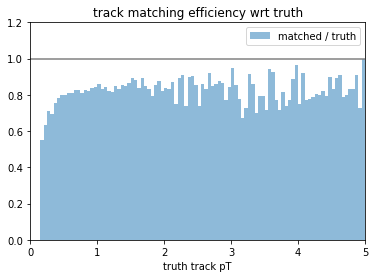

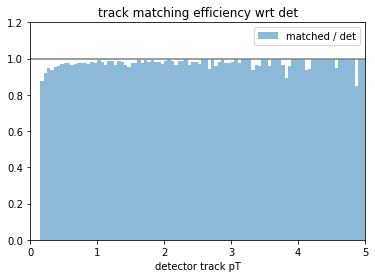

In [25]:
truth = natural_file["h1d_truth_part_pt"]
truth_counts = truth.values()
bin_edges = truth.axis("x").edges()

det = natural_file["h1d_det_part_pt"]
det_counts = det.values()

matched = natural_file["h1d_truth_matched_part_pt"]
matched_counts = matched.values()

det_matched = natural_file["h1d_det_matched_part_pt"]
det_matched_counts = det_matched.values()

plt.hist(bin_edges[:-1], bin_edges, weights=truth_counts, alpha=0.3, label='truth tracks')
plt.hist(bin_edges[:-1], bin_edges, weights=det_counts, alpha=0.3, label='det tracks')
plt.hist(bin_edges[:-1], bin_edges, weights=matched_counts, alpha=0.3, label='matched tracks')
plt.legend()
plt.title('pT distribution of truth tracks') 
plt.xlabel('truth track pT')
plt.xlim(0, 5)
plt.show()

N_truth_parts = np.sum(truth_counts)
N_det_parts = np.sum(det_counts)
N_matched_tracks = np.sum(matched_counts)

print("number truth parts = " + str(N_truth_parts))
print("number det   parts = " + str(N_det_parts))
print("det / truth = " + str(N_det_parts/N_truth_parts))
print("number of matched tracks = " + str(N_matched_tracks))
print("matched / truth = " + str(N_matched_tracks/N_truth_parts))
print("matched / det = " + str(N_matched_tracks/N_det_parts))

plt.hist(bin_edges[:-1], bin_edges, weights=np.divide(matched_counts, truth_counts, out=np.zeros_like(matched_counts), where=truth_counts!=0), alpha=0.5, label='matched / truth')
plt.axhline(y=1, color='grey', linestyle='-')
plt.legend()
plt.title('track matching efficiency wrt truth') 
plt.xlabel('truth track pT')
plt.xlim(0, 5)
plt.ylim(0, 1.2)
plt.show()

plt.hist(bin_edges[:-1], bin_edges, weights=np.divide(det_matched_counts, det_counts, out=np.zeros_like(det_matched_counts), where=det_counts!=0), alpha=0.5, label='matched / det')
plt.axhline(y=1, color='grey', linestyle='-')
plt.legend()
plt.title('track matching efficiency wrt det') 
plt.xlabel('detector track pT')
plt.xlim(0, 5)
plt.ylim(0, 1.2)
plt.show()




In [26]:
synthetic_file = ur.open("./output_mc/preprocessed_mc.root")

In [27]:
synth_tree = synthetic_file['preprocessed']
synth_df = synth_tree.arrays(library='pd')

In [28]:
synth_df.describe()

,gen_energy_weight,gen_R_L,gen_jet_pt,obs_energy_weight,obs_R_L,obs_jet_pt,obs_thrown
count,31578.000000,31578.000000,31578.000000,31578.000000,31578.000000,31578.000000,31578.000000
mean,0.019557,0.227400,29.872323,-3440.326578,-3440.200098,-3422.099062,0.344069
std,0.046872,0.155294,15.816941,4750.247586,4750.339192,4763.464029,0.475071
min,0.000009,0.000000,5.057145,-9999.000000,-9999.000000,-9999.000000,0.000000
25%,0.002015,0.106203,16.720967,-9999.000000,-9999.000000,-9999.000000,0.000000
50%,0.006269,0.219928,29.268875,0.002431,0.088190,14.808868,0.000000
75%,0.018865,0.337090,40.435860,0.013124,0.263804,31.992229,1.000000
max,1.000000,0.757823,78.543484,1.000000,0.726420,61.800604,1.000000


In [29]:
synth_df.head(20)

,gen_energy_weight,gen_R_L,gen_jet_pt,obs_energy_weight,obs_R_L,obs_jet_pt,obs_thrown
0,0.002591,0.000000,13.755534,0.002631,0.000000,13.618322,0.0
1,0.001408,0.050959,13.755534,0.001421,0.049433,13.618322,0.0
2,0.020500,0.264152,13.755534,0.020658,0.265082,13.618322,0.0
3,0.000560,0.356929,13.755534,0.000573,0.366302,13.618322,0.0
4,0.025879,0.464013,13.755534,0.026044,0.464729,13.618322,0.0
5,0.001408,0.050959,13.755534,0.001421,0.049433,13.618322,0.0
6,0.000765,0.000000,13.755534,0.000768,0.000000,13.618322,0.0
7,0.011141,0.216577,13.755534,0.011161,0.218974,13.618322,0.0
8,0.000304,0.324614,13.755534,0.000310,0.335214,13.618322,0.0
9,0.014065,0.424601,13.755534,0.014071,0.426662,13.618322,0.0


In [30]:
theta0_S = synth_df[obs_features].to_numpy() #Simulated, synthetic reco-level
theta0_G = synth_df[gen_features].to_numpy() #Generated, synthetic truth-level

obs_thrown = synth_df['obs_thrown'].to_numpy() # binary if pair DOESN'T pass efficiency cut

In [31]:
N_truth_jets = len(np.unique(theta0_G[:,2]))
N_det_jets = len(np.unique(theta0_S[:,2]))

print("number of truth jets: " + str(N_truth_jets))
print("number of det   jets: " + str(N_det_jets))
print("percentage = " + str(N_det_jets / N_truth_jets))

N_truth_pairs = len(theta0_G)
N_det_pairs = len(np.unique(theta0_S[:,0]))

print("number of truth pairs: " + str(N_truth_pairs))
print("number of det   pairs: " + str(N_det_pairs))
print("percentage = " + str(N_det_pairs / N_truth_pairs))


number of truth jets: 611
number of det   jets: 530
percentage = 0.867430441898527
number of truth pairs: 31578
number of det   pairs: 11840
percentage = 0.3749445816707835
